# Fitando Regressões Não Lineares

Importa bibliotecas necessárias:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import curve_fit

np.random.seed(42)

Define o tamanho da amostra

In [2]:
nsample = 100

Cria um vetor do tamanho da amostra, igualmente espaçado entre 0 e 10

In [3]:
x = np.linspace(0, 10, nsample)

Define a equação que queremos fitar da forma:

$$Y = a - (a - b) \, \exp (- c  X)$$

In [4]:
def f(x, a, b, c):
    return a - (a-b) * np.exp(-c*x)

Cria um ruído branco gaussiano para não ser possível recuperar perfeitamente os coeficientes 

$$ a = 2$$
$$ b = 1$$
$$ c = 0,4$$

In [5]:
e = np.random.normal(size=nsample) * 0.1
x_e = np.maximum(x + e, 0)
y = np.vectorize(f)(x_e, 2, 1, 0.4)

Realiza a regressão com a função [curve_fit do scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html):

In [6]:
# Baseado nesta pergunta do Stackoverflow https://stackoverflow.com/questions/45554107/asymptotic-regression-in-python

popt, pcov = curve_fit(f, x, y)
y_linhas = f(x, *popt)

Plota a linha da regressão e os pontos da variável resposta com ruído branco:

Text(0.5, 1.0, 'Regressão Assintótica')

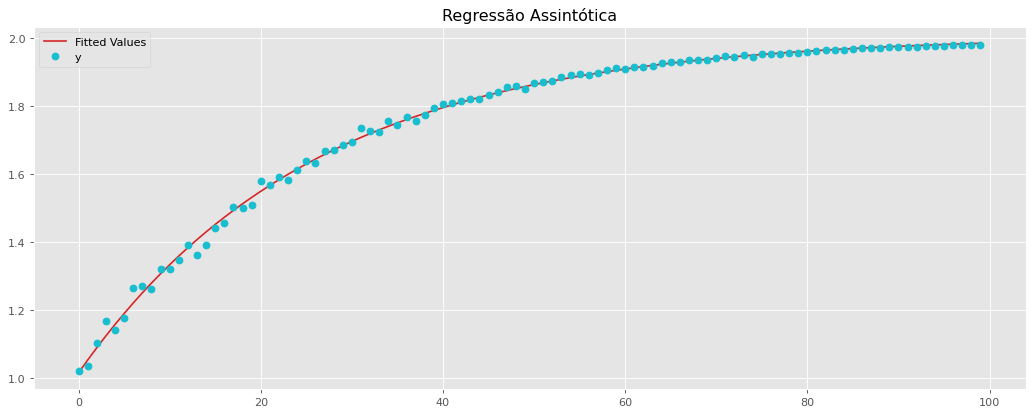

In [7]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(16,6), dpi = 80)
ax.plot(y_linhas, label = "Fitted Values", c = "tab:red")
ax.plot(y, 'o', label = "y", c = "tab:cyan")
ax.legend()
ax.set_title("Regressão Assintótica")

Exibe a ficha os resultados da regressão, lembrando os coeficientes verdadeiros:

$$ a = 2$$
$$ b = 1$$
$$ c = 0,4$$

Calcula o erro padrão dos parâmetros:

In [8]:
perr = np.sqrt(np.diag(pcov))

Exibe os betas estimados da regressão:

In [9]:
print("a = {:.4f} ± {:.4f}, \nb = {:.4f} ± {:.4f}, \nc = {:.4f} ± {:.4f}".format(
    popt[0], perr[0], popt[1], perr[1], popt[2], perr[2]))

a = 2.0067 ± 0.0032, 
b = 1.0148 ± 0.0051, 
c = 0.3833 ± 0.0048


## Bibliografia:

[1] [https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

[2] [https://stackoverflow.com/questions/45554107/asymptotic-regression-in-python](https://stackoverflow.com/questions/45554107/asymptotic-regression-in-python)

[3] [https://www.statforbiology.com/nonlinearregression/usefulequations](https://www.statforbiology.com/nonlinearregression/usefulequations)